In [193]:
import cv2  
import numpy as np  
import types  
import matplotlib.pyplot as plt

## portion of Stagenography

In [194]:
# converting types to binary  
def msg_to_bin(msg):  
    if type(msg) == str:  
        return ''.join([format(ord(i), "08b") for i in msg])  
    elif type(msg) == bytes or type(msg) == np.ndarray:  
        return [format(i, "08b") for i in msg]  
    elif type(msg) == int or type(msg) == np.uint8:  
        return format(msg, "08b")  
    else:  
        raise TypeError("Input type not supported")  
  
# defining function to hide the secret message into the image  
def hide_data(img, secret_msg):  
    # calculating the maximum bytes for encoding  
    nBytes = img.shape[0] * img.shape[1] * 3 // 8  
    print("Maximum Bytes for encoding:", nBytes)  
    # checking whether the number of bytes for encoding is less  
    # than the maximum bytes in the image  
    if len(secret_msg) > nBytes:  
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data!!")  
    secret_msg += '#####'       # we can utilize any string as the delimiter  
    dataIndex = 0  
    # converting the input data to binary format using the msg_to_bin() function  
    bin_secret_msg = msg_to_bin(secret_msg)  
  
    # finding the length of data that requires to be hidden  
    dataLen = len(bin_secret_msg)  
    for values in img:  
        for pixels in values:  
            # converting RGB values to binary format  
            r, g, b = msg_to_bin(pixels)  
            # modifying the LSB only if there is data remaining to store  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Red pixel  
                pixels[0] = int(r[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Green pixel  
                pixels[1] = int(g[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Blue pixel  
                pixels[2] = int(b[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            # if data is encoded, break out the loop  
            if dataIndex >= dataLen:  
                break  
      
    return img  
  
def show_data(img):  
    bin_data = ""  
    for values in img:  
        for pixels in values:  
            # converting the Red, Green, Blue values into binary format  
            r, g, b = msg_to_bin(pixels)  
            # data extraction from the LSB of Red pixel  
            bin_data += r[-1]  
            # data extraction from the LSB of Green pixel  
            bin_data += g[-1]  
            # data extraction from the LSB of Blue pixel  
            bin_data += b[-1]  
    # split by 8-Bits  
    allBytes = [bin_data[i: i + 8] for i in range(0, len(bin_data), 8)]  
    # converting from bits to characters  
    decodedData = ""  
    for bytes in allBytes:  
        decodedData += chr(int(bytes, 2))  
        # checking if we have reached the delimiter which is "#####"  
        if decodedData[-5:] == "#####":  
            break  
    # print(decodedData)  
    # removing the delimiter to display the actual hidden message  
    return decodedData[:-5]  
  
# defining function to encode data into Image  
def encodeText(img_name,data,file_name):  
    img = cv2.imread(img_name)  
  
    # printing the details of the image  
    print("The shape of the image is: ", img.shape) # checking the image shape to calculate the number of bytes in it  
    print("The original image is as shown below: ")  
    # resizing the image as per the need  
    resizedImg = cv2.resize(img, (500, 500))  
    # displaying the image  
    plt.imshow(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)) 
    if (len(data) == 0):  
        raise ValueError('Data is Empty')  
        
    # calling the hide_data() function to hide the secret message into the selected image  
    encodedImage = hide_data(img, data)  
    cv2.imwrite(file_name, encodedImage)  
  
# defining the function to decode the data in the image  
def decodeText(img_name):  
      
    img = cv2.imread(img_name)  # reading the image using the imread() function  
  
    print("The Steganographic image is as follow: ")  
    resizedImg = cv2.resize(img, (500, 500))    # resizing the actual image as per the needs  
    plt.imshow(cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)) 
    text = show_data(img)  
    return text  
  

In [195]:
import numpy as np
import pandas as pd

ds=pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\21BCE1582\ASCII_2.csv")
print(ds)

   Codon (DNA) Abbreviation ASCII
0          TTT          Phe     A
1          TTC          Phe     A
2          TTA        Leu_1     B
3          TTG        Leu_1     B
4          CTT        Leu_1     B
..         ...          ...   ...
59         AGG        Arg_2     X
60         GGT        Gly_1     Y
61         GGC        Gly_1     Y
62         GGA        Gly_2     Y
63         GGG        Gly_2     Y

[64 rows x 3 columns]


In [196]:
import csv

def read_csv(file_path):
    amino_acids = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            Abbreviation = row[0]
            ASCII = (row[2])
            amino_acids.append([Abbreviation,ASCII])
    return amino_acids

# Example usage:
csv_file_path = r'C:\Users\harsh\OneDrive\Desktop\21BCE1582\ASCII_2.csv'  
amino_acids_array = read_csv(csv_file_path)
amino_acids_array

[['Codon (DNA)', 'ASCII'],
 ['TTT', 'A'],
 ['TTC', 'A'],
 ['TTA', 'B'],
 ['TTG', 'B'],
 ['CTT', 'B'],
 ['CTC', 'C'],
 ['CTA', 'C'],
 ['CTG', 'C'],
 ['ATT', 'D'],
 ['ATC', 'D'],
 ['ATA', 'D'],
 ['ATG', 'E'],
 ['GTT', 'F'],
 ['GTC', 'F'],
 ['GTA', 'G'],
 ['GTG', 'G'],
 ['TCT', 'H'],
 ['TCC', 'H'],
 ['TCA', 'H'],
 ['TCG', 'I'],
 ['CCT', 'J'],
 ['CCC', 'J'],
 ['CCA', ' '],
 ['CCG', ' '],
 ['ACT', 'K'],
 ['ACC', 'K'],
 ['ACA', 'K'],
 ['ACG', 'K'],
 ['GCT', 'L'],
 ['GCC', 'L'],
 ['GCA', 'M'],
 ['GCG', 'M'],
 ['TAT', 'N'],
 ['TAC', 'N'],
 ['TAA', 'Stop'],
 ['TAG', ''],
 ['CAT', 'O'],
 ['CAC', 'O'],
 ['CAA', 'P'],
 ['CAG', 'P'],
 ['AAT', 'Q'],
 ['AAC', 'Q'],
 ['AAA', 'R'],
 ['AAG', 'R'],
 ['GAT', 'S'],
 ['GAC', 'S'],
 ['GAA', 'T'],
 ['GAG', 'T'],
 ['TGT', 'U'],
 ['TGC', 'U'],
 ['TGA', 'Stop'],
 ['TGG', 'V'],
 ['CGT', 'W'],
 ['CGC', 'W'],
 ['CGA', 'W'],
 ['CGG', 'X'],
 ['AGT', 'X'],
 ['AGC', 'X'],
 ['AGA', 'X'],
 ['AGG', 'X'],
 ['GGT', 'Y'],
 ['GGC', 'Y'],
 ['GGA', 'Y'],
 ['GGG', 'Y']]

In [197]:
amino_acids_array
len(amino_acids_array)

65

### ENCRYPTION MSSG

In [198]:
def encrypt(text, shift):
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
  shifted_alphabet = alphabet[shift:] + alphabet[:shift]
  table = str.maketrans(alphabet, shifted_alphabet)
  return text.translate(table)

# Get user input for text to encrypt
text = input("Enter the text to encrypt: ")
print(text)

# Get user input for shift value
while True:
  try:
    shift = int(input("Enter the shift value (positive integer): "))
    if shift > 0:
      break
    else:
      print("Shift value must be positive.")
  except ValueError:
    print("Invalid input. Please enter a positive integer.")

# Encrypt the text
encrypted_text = encrypt(text, shift)

# Print the encrypted text
print("Encrypted text:", encrypted_text)

HARSH PANCHAL
Encrypted text: LEVWL TERGLEP


now encoding in DNA sequence(coding still left)

In [199]:
import random

def get_random_output(input_list):
    if not input_list:
        return None
    return random.choice(input_list)

def decode(arr, code):
    decoded_output = []
    for char in code:
        result_list = []
        for pair in arr:
            amino_acid, ascii_value = pair
            if ascii_value == char:
                result_list.append(amino_acid)
            output = get_random_output(result_list)
        decoded_output.append(output)
    return decoded_output

decoded = decode(amino_acids_array,encrypted_text)
print("Decoded output:", decoded)

Decoded output: ['GCC', 'ATG', 'TGG', 'CGC', 'GCC', 'CCA', 'GAG', 'ATG', 'AAG', 'GTG', 'GCT', 'ATG', 'CAG']


In [200]:
combined_string = ''.join(decoded)
print(combined_string)

GCCATGTGGCGCGCCCCAGAGATGAAGGTGGCTATGCAG


Initial image

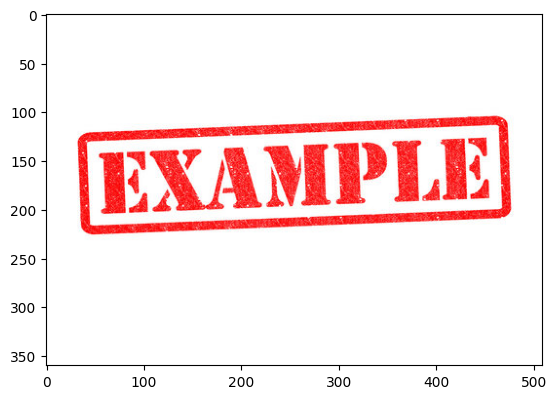

In [201]:
import cv2
import matplotlib.pyplot as plt
image_path = r"C:\Users\harsh\OneDrive\Desktop\21BCE1582\project\encoded_image.png"
img=cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Applying stagnography

The shape of the image is:  (360, 509, 3)
The original image is as shown below: 
Maximum Bytes for encoding: 68715


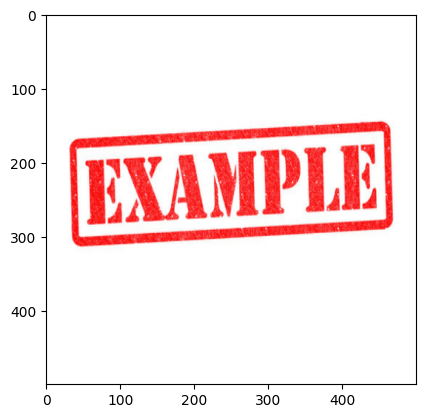

In [202]:
input_text = combined_string
new_image_name = 'encodedddddd.png'

# Encode the text into the image
encodeText(image_path,input_text,new_image_name)

In [203]:
#import matplotlib.pyplot as plt
#plt.imshow(r"C:\Users\harsh\OneDrive\Desktop\21BCE1582\project\encodeddd.png")

So we will get the final Encrypted Image From here

# Decrypting

### retriving message from steganography

The Steganographic image is as follow: 


'GCCATGTGGCGCGCCCCAGAGATGAAGGTGGCTATGCAG'

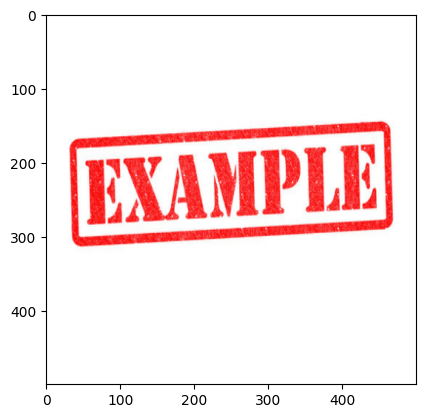

In [204]:
text=decodeText(new_image_name)
text

#### Decoding the messge

In [205]:
def divide_into_pieces(text):
    if len(text) % 3 != 0:
        raise ValueError("Length of text must be divisible by 3")

    # Divide the text into pieces of three characters each and store them in an array
    pieces = [text[i:i+3] for i in range(0, len(text), 3)]
    return pieces

pieces = divide_into_pieces(text)
print(pieces)

['GCC', 'ATG', 'TGG', 'CGC', 'GCC', 'CCA', 'GAG', 'ATG', 'AAG', 'GTG', 'GCT', 'ATG', 'CAG']


In [206]:
def find_abbreviation(array, code):
    for item in array:
        if item[0] == code:
            return item[1]
    return None  # Return None if the code is not found

decoded = []
for i, piece in enumerate(pieces):
    decoded.append(find_abbreviation(amino_acids_array, piece))
print(decoded)

['L', 'E', 'V', 'W', 'L', ' ', 'T', 'E', 'R', 'G', 'L', 'E', 'P']


In [207]:
combined_string = ''.join(decoded)
print(combined_string)

LEVWL TERGLEP


In [208]:
def decrypt(encrypted_text, shift):
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    shifted_alphabet = alphabet[shift:] + alphabet[:shift]
    table = str.maketrans(shifted_alphabet, alphabet)
    return encrypted_text.translate(table)
# Get user input for shift value
while True:
    try:
        shift = int(input("Enter the shift value (positive integer): "))
        if shift > 0:
            break
        else:
            print("Shift value must be positive.")
    except ValueError:
        print("Invalid input. Please enter a positive integer.")

# Decrypt the text
decrypted_text = decrypt(combined_string, shift)

# Print the decrypted text
print("Decrypted text:", decrypted_text)

Decrypted text: HARSH PANCHAL


THE text retrived